<a href="https://colab.research.google.com/github/carlosrome/ML-Research-Project-Physics/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
#Importing required packages.
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
#Importing and visualizing data
data = np.load('/content/gdrive/My Drive/array_heights.npy')


np.random.shuffle(data)

In [4]:
X = data[:,:5]
y = data[:,5:]
from sklearn import preprocessing
X = preprocessing.normalize(X)
X[1200]


array([0.80703816, 0.30548028, 0.49861895, 0.08001334, 0.01866054])

### **Create training, validation, and test datasets**



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeClassifier()

In [7]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to search over
params = {'max_depth': [None, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4]}

# Use cross-validation to tune the hyperparameters
search = GridSearchCV(model, params, cv=5, scoring='accuracy')
search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", search.best_params_)
print("Best score:", search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.6545454545454545


In [8]:
model = DecisionTreeClassifier(max_depth = search.best_params_["max_depth"], min_samples_split =search.best_params_["min_samples_split"], min_samples_leaf = search.best_params_["min_samples_leaf"])
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [9]:
score = accuracy_score(y_test, predictions)
score

0.6808080808080809

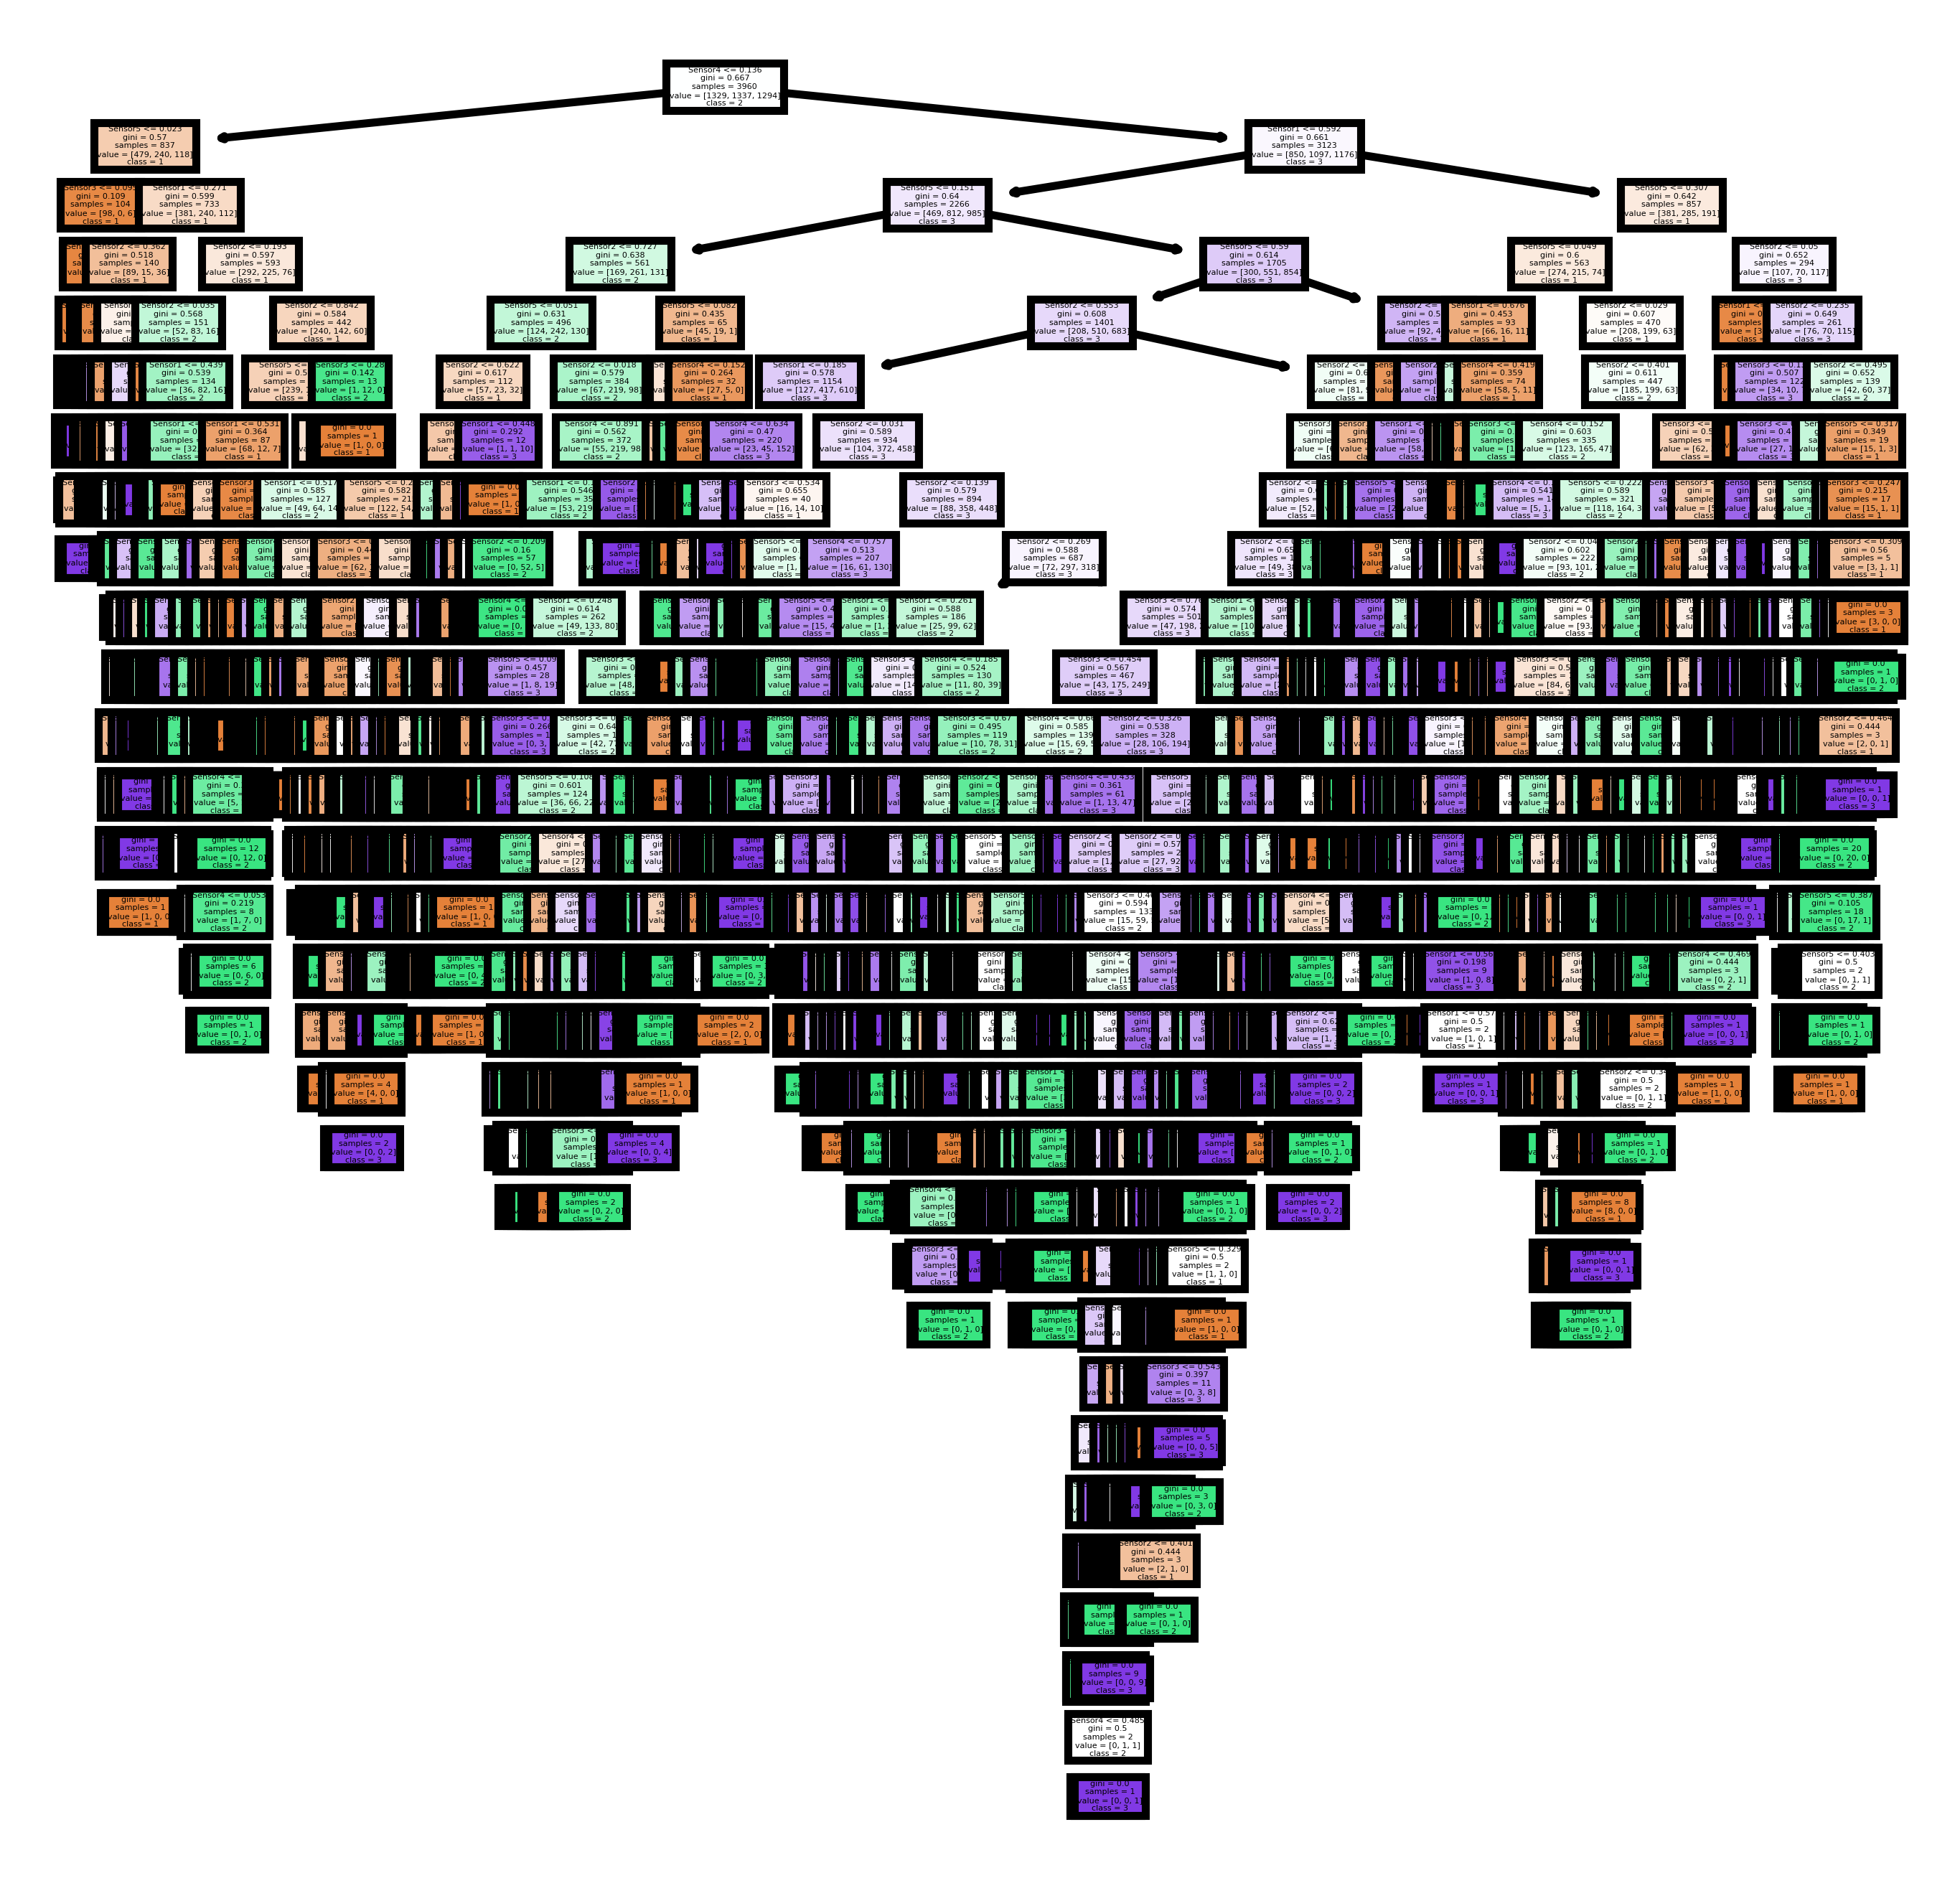

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
fn= ['Sensor1','Sensor2','Sensor3','Sensor4','Sensor5']
cn= ['1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('decision_tree.png')
